# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="

In [5]:
# Set list
city_name = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []


print("Beginning Data Retrieval")
print("----------------------------")
x=0
for city in cities: 
    try: 
        city_data = requests.get(query_url + city).json()
        x=x+1
        print(f"Processing Record {x} | {city}")
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        max_temps.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        #print(city_name)
    except KeyError: 
        print("city name not found")
        
        #print(city_name)
print("------------------------------")        
print("Data retrieval complete")

Beginning Data Retrieval
----------------------------
Processing Record 1 | taolanaro
city name not found
Processing Record 2 | punta arenas
Processing Record 3 | hermanus
Processing Record 4 | laguna
Processing Record 5 | cape town
Processing Record 6 | nemuro
Processing Record 7 | ancud
Processing Record 8 | albany
Processing Record 9 | tooele
Processing Record 10 | atuona
Processing Record 11 | patterson
Processing Record 12 | carnarvon
Processing Record 13 | matay
Processing Record 14 | marcona
city name not found
Processing Record 15 | port hedland
Processing Record 16 | coburg
Processing Record 17 | villamontes
Processing Record 18 | clovis
Processing Record 19 | rikitea
Processing Record 20 | salalah
Processing Record 21 | puerto escondido
Processing Record 22 | yerbogachen
Processing Record 23 | alofi
Processing Record 24 | saint-philippe
Processing Record 25 | new norfolk
Processing Record 26 | hilo
Processing Record 27 | ushuaia
Processing Record 28 | kahului
Processing Recor

Processing Record 236 | beya
Processing Record 237 | utiroa
city name not found
Processing Record 238 | kurilsk
Processing Record 239 | samarai
Processing Record 240 | sitka
Processing Record 241 | olavarria
Processing Record 242 | cibitoke
Processing Record 243 | rus
Processing Record 244 | plettenberg bay
Processing Record 245 | khandyga
Processing Record 246 | derzhavinsk
Processing Record 247 | george town
Processing Record 248 | praia da vitoria
Processing Record 249 | brae
Processing Record 250 | constitucion
Processing Record 251 | namatanai
Processing Record 252 | xixiang
Processing Record 253 | alotau
city name not found
Processing Record 254 | flinders
Processing Record 255 | nova russas
Processing Record 256 | dinguiraye
Processing Record 257 | bonavista
Processing Record 258 | severo-kurilsk
Processing Record 259 | oktyabrskiy
Processing Record 260 | ouadda
Processing Record 261 | karratha
Processing Record 262 | hofn
Processing Record 263 | fortuna
Processing Record 264 | 

Processing Record 473 | manbij
Processing Record 474 | guerrero negro
Processing Record 475 | alice springs
Processing Record 476 | kommunisticheskiy
Processing Record 477 | logan
Processing Record 478 | hayden
Processing Record 479 | rio gallegos
Processing Record 480 | norman wells
Processing Record 481 | adzhamka
Processing Record 482 | tasbuget
city name not found
Processing Record 483 | barcelos
Processing Record 484 | komsomolskiy
Processing Record 485 | gravdal
Processing Record 486 | eskasem
city name not found
Processing Record 487 | road town
Processing Record 488 | la tuque
Processing Record 489 | sao joao da barra
Processing Record 490 | carman
Processing Record 491 | abbeville
Processing Record 492 | vanimo
Processing Record 493 | uyuni
Processing Record 494 | galveston
Processing Record 495 | varkkallai
Processing Record 496 | jining
Processing Record 497 | martil
Processing Record 498 | hammerfest
Processing Record 499 | abonnema
Processing Record 500 | sarangani
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Make a dataframe
# Add lat_lngs
city_data_df = pd.DataFrame({"City Name": city_name, 
                             "Lat": lat,
                             "Lng": lng,
                              "Max Temp": max_temps, 
                              "Humidity": humidity, 
                              "Cloudiness": cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date})
city_data_df.head(10)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,21.31,93,75,0.38,CL,1622608235
1,Hermanus,-34.4187,19.2345,54.90,76,7,4.56,ZA,1622608235
2,Laguna,38.4210,-121.4238,91.90,41,1,6.42,US,1622608236
3,Cape Town,-33.9258,18.4232,56.10,91,0,1.99,ZA,1622608236
4,Nemuro,43.3236,145.5750,68.43,84,100,12.77,JP,1622608237
5,Ancud,-41.8697,-73.8203,44.22,77,99,1.90,CL,1622608066
6,Albany,42.6001,-73.9662,57.52,83,94,2.93,US,1622608001
7,Tooele,40.5308,-112.2983,70.20,36,1,1.28,US,1622608237
8,Atuona,-9.8000,-139.0333,79.74,74,36,15.14,PF,1622608237
9,Patterson,37.4716,-121.1297,88.25,40,8,4.38,US,1622608238


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
city_data_df.to_csv("city_data.csv")

In [ ]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_onehundred = city_data_df.loc[city_data_df["Humidity"]>100]
humid_cities_onehundred = humidity_over_onehundred["City Name"].count()
humid_cities_onehundred

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_df.describe()

# Convert the unicode to a date for the plots (the date the API was called for weather data)
date_title = city_data_df.loc[0, "Date"]
date_title

# Convert the format to mm/dd/yy
date_title = time.localtime()
date_title = time.strftime("%x")
date_title

'06/01/21'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

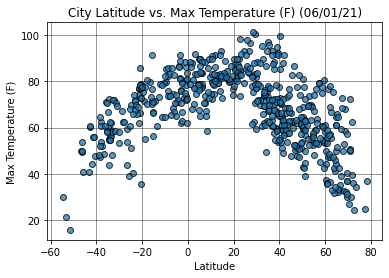

In [15]:
# Create scatter plot with Latitude and Max Temp
# Title and labels
# Add grid

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)

plt.title(f"City Latitude vs. Max Temperature (F) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
 
plt.show()

## Latitude vs. Humidity Plot

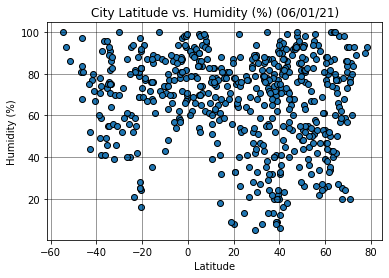

In [16]:
# Create scatter plot with Latitude and Humidity
# Add title and labels
# Ad grid
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Humidity (%) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

plt.show()

## Latitude vs. Cloudiness Plot

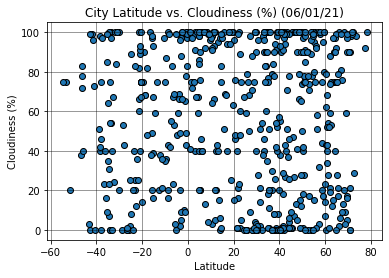

In [17]:
# Create scatter plot with Latitude and Cloudiness 
# Add title and labels
# Add grid
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Cloudiness (%) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

plt.show()

## Latitude vs. Wind Speed Plot

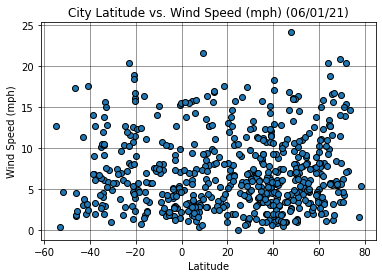

In [18]:
# Create scatter plot with Latitude and Wind Speed
# Add title and labels
# Add grid
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Wind Speed (mph) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# Make a df with the Northern Hemisphere cities

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Laguna,38.4210,-121.4238,91.90,41,1,6.42,US,1622608236
4,Nemuro,43.3236,145.5750,68.43,84,100,12.77,JP,1622608237
6,Albany,42.6001,-73.9662,57.52,83,94,2.93,US,1622608001
7,Tooele,40.5308,-112.2983,70.20,36,1,1.28,US,1622608237
9,Patterson,37.4716,-121.1297,88.25,40,8,4.38,US,1622608238


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# Make a df with the Southern Hemisphere cities
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,21.31,93,75,0.38,CL,1622608235
1,Hermanus,-34.4187,19.2345,54.90,76,7,4.56,ZA,1622608235
3,Cape Town,-33.9258,18.4232,56.10,91,0,1.99,ZA,1622608236
5,Ancud,-41.8697,-73.8203,44.22,77,99,1.90,CL,1622608066
8,Atuona,-9.8000,-139.0333,79.74,74,36,15.14,PF,1622608237


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5


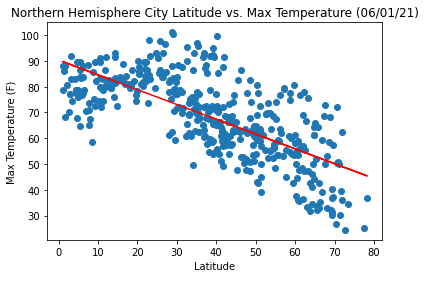

In [21]:
# Define x, y values
n_max_temp_x_values = northern_hemi_df["Lat"]
n_max_temp_y_values = northern_hemi_df["Max Temp"]

# Find linear regression values
# Regress_values = total_equipment * slope + intercept
(n_max_temp_slope, n_max_temp_intercept, n_max_temp_rvalue, n_max_temp_pvalue, n_max_temp_stderr) = linregress(n_max_temp_x_values, n_max_temp_y_values)
n_max_temp_regress_values = np.asarray(n_max_temp_x_values) * n_max_temp_slope + n_max_temp_intercept

# Find r-squared
n_max_temp_rsquared = round(n_max_temp_rvalue**2,2)
print(f"The r-squared is: {n_max_temp_rsquared}")

# Line equation 
n_max_temp_line_eq = "y =" + str(round(n_max_temp_slope,2)) + "x + " + str(round(n_max_temp_intercept,2))

# Create scatter plot
plt.scatter(n_max_temp_x_values, n_max_temp_y_values)

# Add regression line
plt.plot(n_max_temp_x_values, n_max_temp_regress_values, "r-")

# Add title and labels
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add annotation to plot
plt.annotate(n_max_temp_line_eq,(0,10), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_max_temp_rsquared}",(0,0),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.53


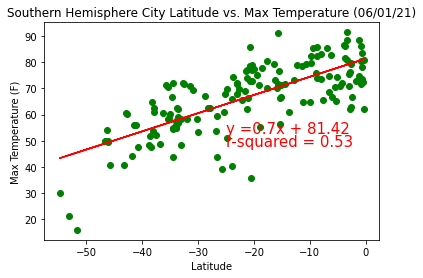

In [23]:
# Define x, y values
s_max_temp_x_values = southern_hemi_df["Lat"]
s_max_temp_y_values = southern_hemi_df["Max Temp"]

# Find linear regression values
# Regress_values = total_equipment * slope + intercept
(s_max_temp_slope, s_max_temp_intercept, s_max_temp_rvalue, s_max_temp_pvalue, s_max_temp_stderr) = linregress(s_max_temp_x_values, s_max_temp_y_values)
s_max_temp_regress_values = np.asarray(s_max_temp_x_values) * s_max_temp_slope + s_max_temp_intercept

# Find r-squared
s_max_temp_rsquared = round(s_max_temp_rvalue**2,2)
print(f"The r-squared is: {s_max_temp_rsquared}")

# Line equation
s_max_temp_line_eq = "y =" + str(round(s_max_temp_slope,2)) + "x + " + str(round(s_max_temp_intercept,2))

# Create scatter plot
plt.scatter(s_max_temp_x_values, s_max_temp_y_values, color="green")

# Add regression line
plt.plot(s_max_temp_x_values, s_max_temp_regress_values, "r-")

# Add title and labels
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add annotation to plot
plt.annotate(s_max_temp_line_eq,(-25,53), fontsize=15, color="red")
plt.annotate(f"r-squared = {s_max_temp_rsquared}",(-25,48),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


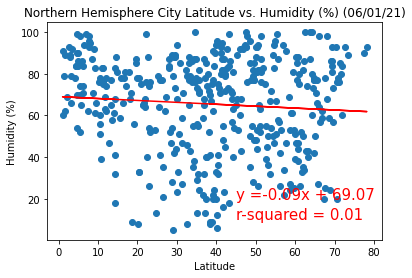

In [24]:
# Define x, y values
n_humidity_x_values = northern_hemi_df["Lat"]
n_humidity_y_values = northern_hemi_df["Humidity"]

# Find linear regression values
# Regress_values = total_equipment * slope + intercept
(n_humidity_slope, n_humidity_intercept, n_humidity_rvalue, n_humidity_pvalue, n_humidity_stderr) = linregress(n_humidity_x_values, n_humidity_y_values)
n_humidity_regress_values = np.asarray(n_humidity_x_values) * n_humidity_slope + n_humidity_intercept

# Find r-squared
n_humidity_rsquared = round(n_humidity_rvalue**2,2)
print(f"The r-squared is: {n_humidity_rsquared}")

# Line equation y = mx + b
n_humidity_line_eq = "y =" + str(round(n_humidity_slope,2)) + "x + " + str(round(n_humidity_intercept,2))

# Create scatter plot
plt.scatter(n_humidity_x_values, n_humidity_y_values)

# Add regression line
plt.plot(n_humidity_x_values, n_humidity_regress_values, "r-")

# Add title and labels
plt.title(f"Northern Hemisphere City Latitude vs. Humidity (%) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add annotation to plot
plt.annotate(n_humidity_line_eq,(45,20), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_humidity_rsquared}",(45,10),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


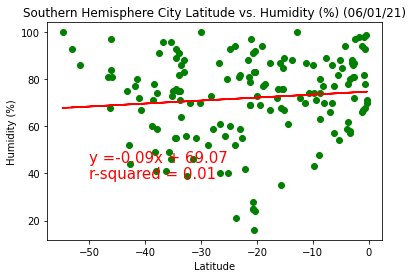

In [25]:
# Define x, y values
s_humidity_x_values = southern_hemi_df["Lat"]
s_humidity_y_values = southern_hemi_df["Humidity"]

# Find linear regression values
# Regress_values = total_equipment * slope + intercept
(s_humidity_slope, s_humidity_intercept, s_humidity_rvalue, s_humidity_pvalue, s_humidity_stderr) = linregress(s_humidity_x_values, s_humidity_y_values)
s_humidity_regress_values = np.asarray(s_humidity_x_values) * s_humidity_slope + s_humidity_intercept

# Find r-squared
s_humidity_rsquared = round(s_humidity_rvalue**2,2)
print(f"The r-squared is: {s_humidity_rsquared}")

# Line equation y = mx + b
s_humidity_line_eq = "y =" + str(round(s_humidity_slope,2)) + "x + " + str(round(s_humidity_intercept,2))

# Create scatter plot
plt.scatter(s_humidity_x_values, s_humidity_y_values, color="green")

# Add regression line
plt.plot(s_humidity_x_values, s_humidity_regress_values, "r-")

# Add title and labels
plt.title(f"Southern Hemisphere City Latitude vs. Humidity (%) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add annotation to plot
plt.annotate(n_humidity_line_eq,(-50,45), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_humidity_rsquared}",(-50,38),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


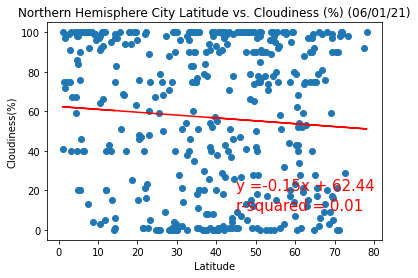

In [26]:
# Define x, y values
n_cloudiness_x_values = northern_hemi_df["Lat"]
n_cloudiness_y_values = northern_hemi_df["Cloudiness"]

# Find linear regression values
# Regress_values = total_equipment * slope + intercept
(n_cloudiness_slope, n_cloudiness_intercept, n_cloudiness_rvalue, n_cloudiness_pvalue, n_cloudiness_stderr) = linregress(n_cloudiness_x_values, n_cloudiness_y_values)
n_cloudiness_regress_values = np.asarray(n_cloudiness_x_values) * n_cloudiness_slope + n_cloudiness_intercept

# Find r-squared
n_cloudiness_rsquared = round(n_cloudiness_rvalue**2,2)
print(f"The r-squared is: {n_cloudiness_rsquared}")

# Line equation y = mx + b
n_cloudiness_line_eq = "y =" + str(round(n_cloudiness_slope,2)) + "x + " + str(round(n_cloudiness_intercept,2))

# Create scatter plot
plt.scatter(n_cloudiness_x_values, n_cloudiness_y_values)

# Add regression line
plt.plot(n_cloudiness_x_values, n_cloudiness_regress_values, "r-")

# Add title and labels
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness (%) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add annotation to plot
plt.annotate(n_cloudiness_line_eq,(45,20), fontsize=15, color="red")
plt.annotate(f"r-squared = {n_cloudiness_rsquared}",(45,10),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01


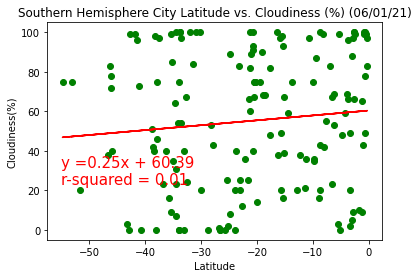

In [27]:
# Define x, y values
s_cloudiness_x_values = southern_hemi_df["Lat"]
s_cloudiness_y_values = southern_hemi_df["Cloudiness"]

# Find linear regression values
# Regress_values = total_equipment * slope + intercept
(s_cloudiness_slope, s_cloudiness_intercept, s_cloudiness_rvalue, s_cloudiness_pvalue, s_cloudiness_stderr) = linregress(s_cloudiness_x_values, s_cloudiness_y_values)
s_cloudiness_regress_values = np.asarray(s_cloudiness_x_values) * s_cloudiness_slope + s_cloudiness_intercept

# Find r-squared
s_cloudiness_rsquared = round(s_cloudiness_rvalue**2,2)
print(f"The r-squared is: {s_cloudiness_rsquared}")

# Line equation y = mx + b
s_cloudiness_line_eq = "y =" + str(round(s_cloudiness_slope,2)) + "x + " + str(round(s_cloudiness_intercept,2))

# Create scatter plot
plt.scatter(s_cloudiness_x_values, s_cloudiness_y_values, color="green")

# Add regression line
plt.plot(s_cloudiness_x_values, s_cloudiness_regress_values, "r-")

# Add title and labels
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness (%) ({date_title})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add annotation to plot
plt.annotate(s_cloudiness_line_eq,(-55,32), fontsize=15, color="red")
plt.annotate(f"r-squared = {s_cloudiness_rsquared}",(-55,23),fontsize=15,color="red")

plt.show()